# Exercise 8 - Conjoint Analysis (22 Points)

In the event of a persistent problem, do not hesitate to contact the course instructors under
- christoph.staudt@uni-jena.de

### Submission

- Deadline of submission:
        10.06.2022 14:00
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=28746)


# Conjoint Analysis

Conjoint Analysis is about learning preferences (i.e. young people prefer beer over scotch) from data. It is covered in the last chapter of the script and most likely won't be reached in the lecture anymore. Thus, we will have a look at the topic in this Lab. You will only need the first two pages of the chapter to solve this exercise and I copied the relevant parts into this notebook for convenience. I also extended them with some exmaples.

Assume that we are given a set $A$ of *options*. In a preference elicitation
task we provide respondents with two options $a,b\in A$ and ask them
to point out their preferred option. Note that an option can have multiple features like a (big,green,pickup) vs a (small,red,motorcycle).  From a sequence of such
*choice tasks* we want to learn a *value function*
$$
v: A\rightarrow \mathbb{R}
$$
that we want to use for predicting the outcome of choice tasks as
follows
$$
a \,\succeq\, b, \,\textsf{ if }\, v(a) \,\geq\, v(b), 
$$
where $\preceq$ symbolizes the preference relation.  The value
function provides us with metric information that can be interpreted
as a degree of confidence in our prediction, i.e., we are more
confident in our prediction, if the difference $|v(a)-v(b)|$ is large
compared to the difference of the value function on other pairs of
choice options. We will see that we can learn $v$ with methods we already know.


In *conjoint analysis* we make two additional assumptions. First,
we assume that the option space $A$ is a Cartesian product of finite
sets $A_i,\in i\in [n]$, i.e.,
$$
A \,=\, A_1\times \ldots \times A_n.
$$
Second, we assume that the value function can be decomposed linearly,
i.e.,
$$
v \,=\, \sum_{i=1}^n v_i,\: \textsf{ with }\:
v_i:A_i\rightarrow\mathbb{R}.
$$

The functions $v_i,\, i\in [n]$ are called *partworth functions*.



---

Reusing the example from above $A$ could look like this:
$$A= A_1 \times A_2 \times A_3$$ 
for
$$\quad A_1 = \{\text{small},\text{medium},\text{big}\}, \quad A_2= \{\text{red},\text{green},\text{blue}\}, \quad A_3 = \{\text{pickup},\text{car},\text{motorcycle},\text{bycicle}\}.$$


The function $v_i$ could look like this: 


| $a_1$      	| small 	| medium 	| big 	| 
|------------	|-------	|--------	|-----	|
| $v_1(a_1)$ 	| 1     	| 2      	| 1   	|

<br />


| $a_2$      	| red    	| green 	| blue 	| 
|------------	|-------	|--------	|-----	|
| $v_3(a_3)$ 	| 2     	| 1      	| 4   	|

<br />

| $a_3$      	| pickup 	| car   	| motorcycle 	| bycicle |
|------------	|-------	|--------	|-----	        | ------  |
| $v_3(a_3)$ 	| 1     	| 3      	| 1   	        | 5       |

---

Since the sets $A_i,\, i\in [n]$ are finite, $v_i(a)$ for $a \in A_i$ only maps to a finite number of values too. Therefore, the problem
of estimating the value function $v$ from a sequence of choice data
boils down to estimating a vector $v\in \mathbb{R}^{k}$, where
$$
k\,=\, \sum_{i=1}^n k_i \:\textsf{ and }\: k_i \,=\, |A_i|. \quad (\text{in our example: } k=\sum_{i=1}^3 k_i = 3+3+4=10) 
$$

For $a=(a_1,\ldots,a_n)\in A$ the values $v_i(a_i),\, i\in [n]$ are
called the *partworth values*. The name conjoint analysis
stresses the fact the partworth values are measured *jointly* in
the choice experiments.

The vector $v\in \mathbb{R}^{k}$ is just the vector of all partworth
values. The entries in $v$ are ordered according to the natural order
on $[n]$ and arbitrary but fixed orders on each of the sets
$A_i$. Using this ordering, an element $a\in A$ can be represented by
a characteristic vector $\textsf{vec}(1)_a \in \{0,1\}^k$ that has
exactly $n$ entries whose value is $1$, namely one entry for every set
$A_i,i\in [n]$, and $k-n$ entries that are $0$.

---

In our Example: $v=(1,2,1,2,1,4,1,3,1,5)$

And for $a$=(big,green,pickup) $\textsf{vec}(1)_a = (0,0,1,0,1,0,1,0,0,0)$

---



Assume now that we are given choice data of the form
$$
\big( (a^{(1)},b^{(1)}),y^{(1)}\big),\ldots,\big(
(a^{(m)},b^{(m)}),y^{(m)}\big),
$$
where the $a^{(i)}, b^{(i)}\in A$ are two choice options, and
$y^{(i)}=1$, if $a^{(i)}$ is preferred over $b^{(i)}$, and
$y^{(i)}=-1$ otherwise. The value function $v$ should satisfy the following constraints
$$
y^{(i)} \big( v(a^{(i)}) - v(b^{(i)})\big) \,\geq\, 0.
$$

Using the characteristic vectors $\textsf{vec}(1)_a,\, a\in A$ we can
rewrite these constraints as
$$
y^{(i)} \big(\textsf{vec}(1)_{a^{(i)}} -
\textsf{vec}(1)_{b^{(i)}}\big)^\top v \,\geq\, 0,
$$
if we define $\,n^{(i)} = \textsf{vec}(1)_{a^{(i)}} - \textsf{vec}(1)_{b^{(i)}} \in \{-1,0,1\}^k,\, i\in [n]$, as
$$
y^{(i)} {n^{(i)}}^\top v \,\geq\, 0.
$$

The $n^{(i)},\, i\in [m]$ can be considered as normal vectors of
hyperplanes that pass through the origin. Hence, the data for a
conjoint analysis problem are labeled hyperplanes
$$
(n^{(1)},y^{(1)}),\ldots, (n^{(m)},y^{(m)}) \,\in\, \{-1,0,1\}^k
\times \{\pm 1\}
$$
and the sought for model is given by a partworth value vector $v\in \mathbb{R}^{k}$. This formulation makes it possible to learn $v$ using binary classification methods, like logistic regression.




## The Dataset

In this exercise we will use preprocessed [statistics of Bundesliga clubs](https://www.whoscored.com/Regions/81/Tournaments/3/Seasons/6902/Stages/15243/TeamStatistics/Germany-Bundesliga-2017-2018) to predict their ranking in the table. Each dataset has the following attributes:

- `Team`: team name
- `Shots pg`: average shots on opponent goal per game
- `Yellow cards`: number of yellow cards
- `Red cards`: number of red cards
- `Possession%`: average ball possession percentage per game
- `Pass%`: average percentage of sucessful passes
- `AerialsWon`: average number of aerial duels won per game
- `Rank`: rank in the table

Each of these attributes was discretized into 3 buckets based on the values within the season:

- 0: lower third, i.e. values below 1/3 of the maximum for this feature.
- 1: central third, i.e. values above 1/3 and below 2/3 of the maximum for this feature.
- 2: upper third, i.e. values above 2/3 of the maximum for this feature.

### Task 1 (1 Point)

Load and inspect the dataset for the season 2017/2018 stored in `buli_1718.csv`. I recommend to use pandas to do both.

In [127]:
# TODO: load season 2017/2018 dataset
import pandas as pd
df = pd.read_csv("buli_1718.csv")
print(df)

                   Team  Shots pg  Yellow cards  Red cards  Possession%  \
0         Bayern Munich         2             0          0            2   
1              Freiburg         0             0          2            0   
2         VfB Stuttgart         0             1          0            0   
3   Borussia M.Gladbach         1             0          0            1   
4            Hoffenheim         1             2          0            0   
5      Bayer Leverkusen         2             1          1            1   
6            Schalke 04         0             2          0            0   
7               FC Koln         0             2          0            0   
8          Hamburger SV         0             1          1            0   
9     Borussia Dortmund         1             0          1            2   
10        Hertha Berlin         0             0          1            0   
11             Mainz 05         1             1          1            0   
12          Hannover 96  

### Task 2 (4 Points) Preprocess dataset

In conjoint analysis the dataset has to be a series of choice tasks
\begin{equation}
((a^{(i)},b^{(i)}),y^{(i)})\,,
\end{equation}
where $y^{(i)}=1$, if $a$ has been chosen and $-1$ otherwise.

We can transform our dataset into choice tasks if we consider $a$ and $b$ as the properties of teams and choose the team with the higher ranking. Of course $a$ and $b$ are **not** containing the ranking themselves.



In [128]:
# TODO: Tranform into dataset ((a,b),y)
n_teams = len(df)
features = df.to_numpy()[:, 1:-1]
ranks = df.to_numpy()[:, -1]
options = np.array([[features[a], features[b]] for a in range(n_teams) for b in range(a + 1, n_teams)]) # list of tuples (a,b)
choices = np.array([1 if ranks[a] < ranks[b] else -1 for a in range(n_teams) for b in range(a + 1, n_teams)]) # list of y

assert len(options) == 153
assert len(choices) == 153
# shots, y cards, r cards, possesion, pass, aerials
assert [2, 0, 0, 2, 2, 0] in  [list(item[0]) for item in options]
assert [0, 0, 2, 0, 0, 2] in [list(item[1]) for item in options]
assert sum(choices) == 29

### Task 3 (2 Points) Transform to characteristic vector

Implement a function `vec`, that transforms $a^{(i)}$ into $\textsf{vec}(1)_{a^{(i)}}$. 

In [129]:
import numpy as np


N_CLASSES = 3

def vec(a):
    # TODO: Tranform item into vectorized form
    vec_a = [0] * N_CLASSES * len(a)
    # index i, class c
    for i, c in enumerate(a):
        vec_a[i * N_CLASSES + c] = 1
    return np.array(vec_a)

assert np.allclose(
    vec([2, 0, 1, 2, 2, 0]),
    np.array(
        [
            0.0,
            0.0,
            1.0,
            1.0,
            0.0,
            0.0,
            0.0,
            1.0,
            0.0,
            0.0,
            0.0,
            1.0,
            0.0,
            0.0,
            1.0,
            1.0,
            0.0,
            0.0,
        ]
    ),
)

### Task 4 (1 Point) Normal vector
Now use `vec` to transform $((a^{(i)},b^{(i)}),y^{(i)})$ into $(n^{(i)},y^{(i)})$ for $\,n^{(i)} = \textsf{vec}(1)_{a^{(i)}} - \textsf{vec}(1)_{b^{(i)}} \in \{-1,0,1\}^k,\, i\in [n]$

In [130]:
# TODO: Transform dataseet to use the normal vector
normal_options = np.array([vec(a) - vec(b) for a, b in options])
print(normal_options)

[[-1  0  1 ...  1  0 -1]
 [-1  0  1 ...  1 -1  0]
 [ 0 -1  1 ...  0  0  0]
 ...
 [-1  1  0 ...  0  0  0]
 [-1  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


# Estimation of partworth vector

Now we have a set of labeled hyperplanes and are looking for a value function, that can predict which hyperplane we choose. Our main assumption is, that this function is based on a vector of partworths $v$.

### Task 5 (2 Points)
See above, how the value function is defined and implement a version `value`, that takes an item $a$ from the dataset and a partworth vector $v$ as input and outputs the value of $a$.

In [131]:
def value(a, v):
    # TODO: implement value function
    return vec(a) @ v

assert np.isclose(
    value(
        [2, 0, 0, 2, 2, 0],
        np.array(
            [
                -0.52913869,
                -0.24177654,
                0.77091523,
                1.01233499,
                -0.43182966,
                -0.58050533,
                1.11086899,
                -0.03757881,
                -1.07329018,
                0.03699142,
                -0.55302226,
                0.51603084,
                -0.98155901,
                0.4883774,
                0.49318161,
                0.2981997,
                -0.0130916,
                -0.2851081,
            ]
        ),
    ),
    4.20153136,
    0.00001,
)


### Task 6 (2 Points)

Estimate $v$ using [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), take care to set the right parameters, i.e. do you need to fit the intercept?

In [132]:
# TODO: use logistic regression to estimate v
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=False, random_state=0).fit(normal_options, choices)
v = clf.coef_


# This might not work, but I believe it should
assert np.allclose(v,np.array([-0.5334730689056519,
 -0.2901350223844856,
 0.8236080912901382,
 0.6557172973240942,
 -0.43613564958276047,
 -0.2195816477413344,
 0.733201669586001,
 0.04388070900973205,
 -0.7770823785957331,
 -0.06204036402459023,
 -0.6597617281269711,
 0.7218020921515613,
 -0.947254938547856,
 0.5530318302558357,
 0.39422310829201995,
 0.6447842697632419,
 -0.17582400348232136,
 -0.4689602662809207]),0.001)

### Task 7 (2 Points)
Implement a `predict` function, that takes two items and the partworth vector and outputs -1 or 1.

Test this function on the dataset and determine the accuracy.

In [133]:
def predict(a, b, v):
    # TODO: predict 1 or -1
    return 1 if (vec(a) - vec(b)) @ v.T >= 0 else -1

# TODO: determine accuracy

predictions = np.array([predict(a, b, v) for a, b in options])
acc = np.mean(choices == predictions)


# Bayern should be predicted to be better than Wolfsburg
assert predict([2, 0, 0, 2, 2, 0], [0, 1, 2, 0, 1, 1],v) == 1
# Print accuracy, should be around 79%
print(f"Accuracy: {acc}")

Accuracy: 0.7777777777777778


The estimated partworth vector contains information on the importance of the features on the table rank.

As an example, there are three entries in $v$, that correspond to `shots pg` being below average, average or above average in the season. We would expect above average to have the highest value among these three, because teams with more shots per game tend to score more goals and win more games.

### Task 8 (2 Points)
Visualize the information contained in the partworth vector. How do you interpret this information? Is everything as you would expect?

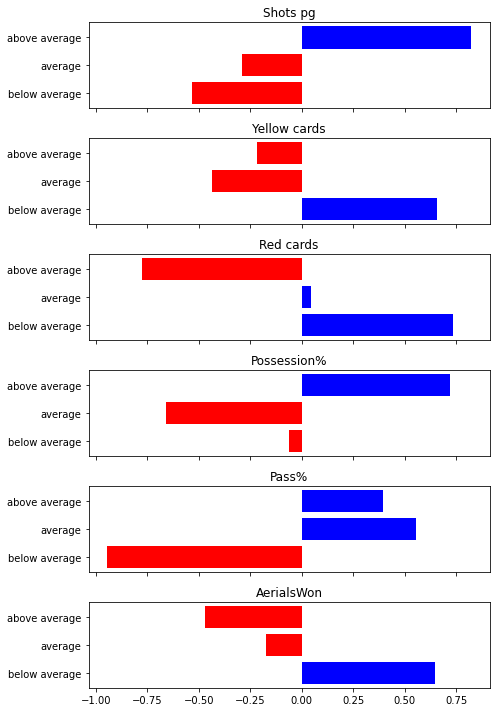

In [134]:
# TODO: visualize + interpret priorities set by v, you can use imshow for this again for example
import matplotlib.pyplot as plt


feature_names = [str(index) for index in df.keys()[1:-1]]
N_FEATURES = len(feature_names)

fig, axs = plt.subplots(N_FEATURES, 1, sharex=True, figsize=(7,10))
for i in range(N_FEATURES):
    importances = v[0][i * N_CLASSES : (i + 1) * N_CLASSES]
    colors = ["red" if importance < 0 else "blue" for importance in importances]
    axs[i].set_title(feature_names[i])
    axs[i].barh(["below average", "average", "above average"], importances, color=colors)
plt.tight_layout()
plt.show()

# Prediction of table ranking

Besides getting an inside into the effect of certain attributes, we can also use the partworth vector to predict the ranking of other items.

### Task 9 (1 Point)

Load the dataset for the season 2018/2019 stored in `buli_1819.csv`.

In [135]:
# TODO: load season 2018/2019 dataset
df = pd.read_csv("buli_1819.csv")

### Task 10 (2 Points)

Print the table that you would predict with the partworth vector we estimated from the season 2017/2018. I.e. sort the table from the new dataset according to your value function defined above, using your estimated v.

Hint: If Bayern is somewhere on top and Nürnberg somewhere on the bottom, its a good rating ^^

In [136]:
from functools import cmp_to_key

# TODO: print predicted table
df_numpy = df.to_numpy()
compare = lambda team_a, team_b: - predict(team_a[1:-1], team_b[1:-1], v)
predicted_rankings = np.array(sorted(df_numpy, key=cmp_to_key(compare)))

# looks like a good rating :D
print(predicted_rankings)

[['Bayern Munich' 2 0 1 2 2 0 1]
 ['Bayer Leverkusen' 1 0 0 2 2 0 4]
 ['Borussia Dortmund' 0 0 1 2 2 0 2]
 ['Borussia M.Gladbach' 1 0 0 1 2 0 5]
 ['Hoffenheim' 2 2 1 1 1 0 9]
 ['Freiburg' 0 1 1 0 1 0 13]
 ['Wolfsburg' 0 2 0 1 1 1 6]
 ['Werder Bremen' 1 1 1 1 1 1 8]
 ['Augsburg' 1 1 0 0 0 1 15]
 ['Mainz 05' 1 1 0 0 0 1 12]
 ['Fortuna Duesseldorf' 0 2 0 0 0 1 10]
 ['RB Leipzig' 1 2 0 0 0 2 3]
 ['Hertha Berlin' 0 2 2 0 1 2 11]
 ['Eintracht Frankfurt' 0 1 1 0 0 2 7]
 ['Schalke 04' 0 2 2 0 0 1 14]
 ['Nuernberg' 0 1 2 0 0 1 18]
 ['Hannover 96' 0 1 2 0 0 1 17]
 ['VfB Stuttgart' 0 2 2 0 0 2 16]]


We saw, that $v$ implies an order (ranking) among the items, which results in a table prediction.

### Task 11 (3 Points)

Define some measure of quality to quantify how good the prediction of the table is compared to the true ranking in the table.

In [140]:
# TODO: quantify quality of predicted ranking compared to true ranking
true_ranks = predicted_rankings[:, -1]
predicted_ranks = np.arange(len(predicted_rankings)) + 1
# this is not invariant to the number of teams in the roster, but i think the mean absolute distance of rank is still a good measure
print(np.mean(np.abs(true_ranks - predicted_ranks)))
# this is almost the same, just with the relative distance instead of the absolute distance
print(np.mean(np.abs((true_ranks - predicted_ranks) / len(predicted_rankings))))

2.6666666666666665
0.14814814814814814
